In [21]:
import numpy as np
from LogisticRegression_ import LogisticRegressionGD

from sklearn import datasets

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

In [3]:
# Load the iris dataset
iris=datasets.load_iris()
X=iris.data
y=iris.target
X.shape,y.shape

((150, 4), (150,))

In [4]:
# Since there are 4 features let's decompose the features into lower Dimension via PCA
# and retaining the information as much as possible.

reduce=PCA(n_components=2).fit(X)
X=reduce.transform(X)
X.shape

(150, 2)

In [18]:
# Now let's split the dataset into training and testing 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
x_train.shape,x_test.shape

((105, 2), (45, 2))

In [19]:
# Our LogisticRegression only performs the task of Binary Classification hence we'll select only two classes
x_train_2=x_train[(y_train==0) | (y_train == 1)]
y_train_2=y_train[(y_train==0)|(y_train==1)]
x_train_2.shape,y_train_2.shape

((70, 2), (70,))

In [10]:
# Now let's fit our model 
lrclf=LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1).fit(x_train_2,y_train_2)

In [11]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

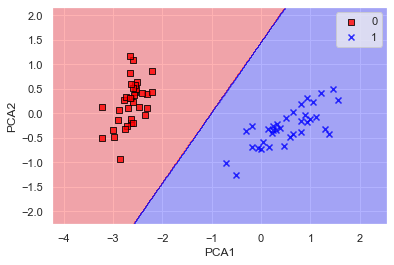

In [15]:
plot_decision_regions(x_train_2,y_train_2,classifier=lrclf)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

Hence, our LogisticRegression model performs a great job of binary classification. 

# Implementing LogisticRegression via Scikit learn

In [23]:
# Let's prepare the data for LR. LR performs multiclass classification unlike in our algorithm via 'OVR' algo
# Since, LR is a linear based model, feature scaling is very important and all the feature needs to be on the same
# scale. Hence, we'll standardise the data.
scaler=StandardScaler().fit(x_train)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

# let's combine both the training and the testing data
x_combined=np.vstack([x_train_std,x_test_std])
y_combined=np.hstack([y_train,y_test])
x_combined.shape,y_combined.shape

((150, 2), (150,))

In [24]:
# let's instantiate lr object with some hyperparameter values
lr=LogisticRegression(C=100,random_state=1).fit(x_combined,y_combined)

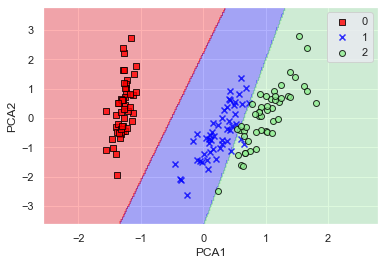

In [25]:
# Let's visualise how this algorithm plots the decision boundries
plot_decision_regions(x_combined,y_combined,classifier=lr)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

Therefore, we can see how well the data is classified even after we decompose the features to just 2 features. Hence LogisticRegression does a great job of classifying the iris flowers

In [26]:
# This f'n helps us to predict the probability for the respective class.
lr.predict_proba(x_test_std[:3,:])

array([[3.19827317e-07, 3.21622312e-02, 9.67837449e-01],
       [9.99669609e-01, 3.30391022e-04, 1.11975276e-18],
       [9.98980024e-01, 1.01997553e-03, 6.84442856e-18]])

In [30]:
# To return the class we can use the following
print(lr.predict_proba(x_test_std[:3,:]).argmax(axis=1))

# or can directly use the .predict method
lr.predict(x_test_std[:3,:])

[2 0 0]


array([2, 0, 0])